### German Traffic Signs Perception

In [157]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [158]:
%ls german-traffic-signs

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: B8C6-5D7D

 c:\Users\dknjy\.anaconda\autonomous\Self-Driving Car Deep Course\Lane Detection\Traffic Signs\german-traffic-signs ���͸�

2024-07-19  ���� 06:50    <DIR>          .
2024-07-21  ���� 05:14    <DIR>          ..
2024-07-19  ���� 06:50             1,043 signnames.csv
2024-07-19  ���� 06:50        38,888,118 test.p
2024-07-19  ���� 06:50       107,146,452 train.p
2024-07-19  ���� 06:50        13,578,712 valid.p
               4�� ����         159,614,325 ����Ʈ
               2�� ���͸�   5,770,719,232 ����Ʈ ����


### Preprocessing Images

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import pickle
import pandas as pd 
import random 

In [160]:
np.random.seed(0)

In [161]:
with open('german-traffic-signs/train.p', 'rb' ) as f:
    train_data = pickle.load(f)

with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)

with open('german-traffic-signs/test.p', 'rb' ) as f:
    test_data = pickle.load(f)

print(type(train_data))

X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']


<class 'dict'>


In [162]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [163]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the numnber of labels"
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the numnber of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the numnber of labels"
assert(X_train.shape[1:] == (32, 32, 3)), "The dimensions of the images are not 32 x 32 x 3"
assert(X_val.shape[1:] == (32, 32, 3)), "The dimensions of the images are not 32 x 32 x 3"
assert(X_test.shape[1:] == (32, 32, 3)), "The dimensions of the images are not 32 x 32 x 3"



In [164]:
data = pd.read_csv("german-traffic-signs/signnames.csv")
print(data)




    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

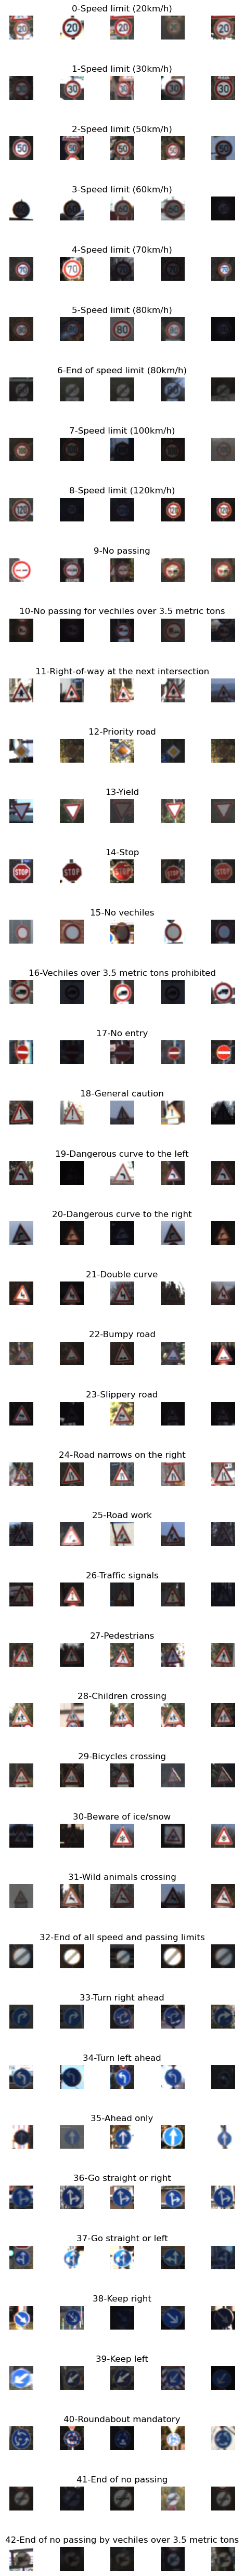

In [165]:
num_of_samples = []

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, (len(x_selected) - 1)), :, :], cmap = plt.get_cmap('gray'))
        axs[j][i].axis('off')
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["SignName"])
            num_of_samples.append(len(x_selected))

    # (index, Series)


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


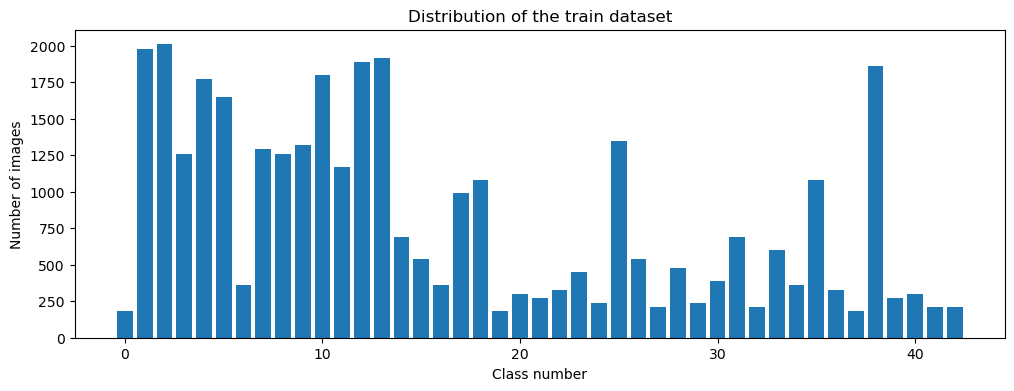

In [166]:
print(num_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


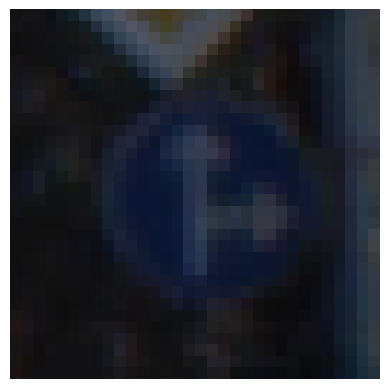

In [167]:
import cv2 

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


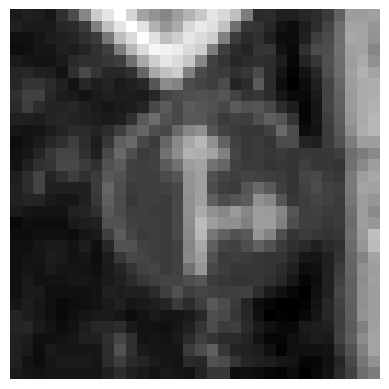

In [168]:
def grayscale(img):
    img =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img 

img = grayscale(X_train[1000])

plt.imshow(img, cmap='gray')
plt.axis("off")
print(img.shape)

(32, 32)


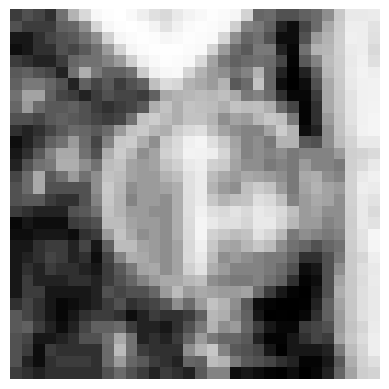

In [169]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img 

img = equalize(img)
plt.imshow(img, cmap = 'gray')
plt.axis("off")
print(img.shape)


In [170]:
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img 

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))


(34799, 32, 32)


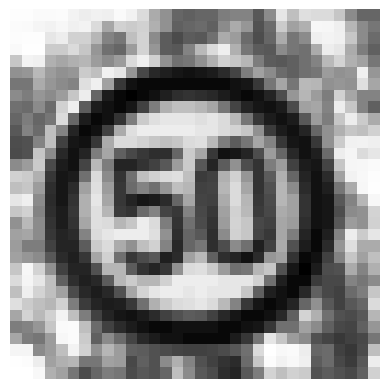

In [171]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)], cmap = 'gray')
plt.axis("off")
print(X_train.shape)

In [172]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)



### Fit Generator

In [173]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)
datagen.fit(X_train)

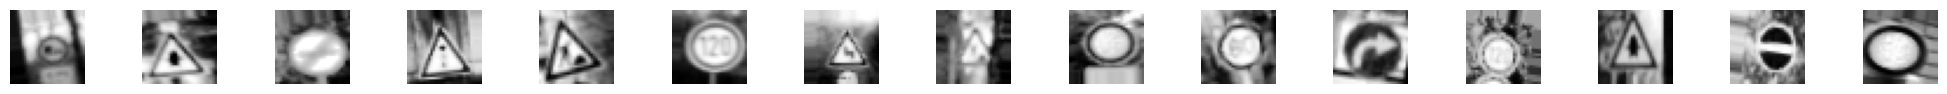

In [174]:
batches = datagen.flow(X_train, y_train, batch_size=20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32), cmap = 'gray')
    axs[i].axis('off')

In [175]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [176]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)


### leNet Implementation

In [177]:
def modified_model():
    model = Sequential()
    model.add(Conv2D(60, (5, 5), input_shape = (32, 32, 1), activation='relu'))
    model.add(Conv2D(60, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model 



In [178]:
model = modified_model()
print(model.summary())

c:\Users\dknjy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 24, 24, 60)     │        90,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 12, 12, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 10, 10, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 30)       │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 500)            │       240,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 43)             │        21,543 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None


In [181]:
# history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=400, verbose = 1, shuffle = 1)

history = model.fit(datagen.flow(X_train, y_train, batch_size=50), steps_per_epoch=2000, epochs = 10, validation_data = (X_val, y_val), shuffle=1)

Epoch 1/10


c:\Users\dknjy\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 696/2000 ━━━━━━━━━━━━━━━━━━━━ 1:42 79ms/step - accuracy: 0.2104 - loss: 2.8873

c:\Users\dknjy\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 62s 29ms/step - accuracy: 0.3244 - loss: 2.4036 - val_accuracy: 0.8433 - val_loss: 0.5302
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 63s 31ms/step - accuracy: 0.7228 - loss: 0.8948 - val_accuracy: 0.9585 - val_loss: 0.1555
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 63s 31ms/step - accuracy: 0.8263 - loss: 0.5572 - val_accuracy: 0.9612 - val_loss: 0.1222
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 63s 31ms/step - accuracy: 0.8599 - loss: 0.4394 - val_accuracy: 0.9803 - val_loss: 0.0738
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 63s 31ms/step - accuracy: 0.8876 - loss: 0.3594 - val_accuracy: 0.9757 - val_loss: 0.0743
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 63s 31ms/step - accuracy: 0.9004 - loss: 0.3169 - val_accuracy: 0.9755 - val_loss: 0.0766
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 67s 33ms/step - accuracy: 0.9136 - loss: 0.2699 - val_accuracy: 0.9800 - val_loss: 0.0603
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 59s 29ms/step - accuracy: 0.9200 - loss: 0.25

Text(0.5, 0, 'epoch')

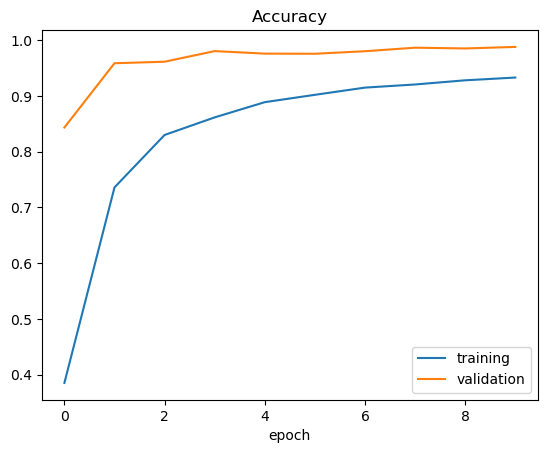

In [182]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

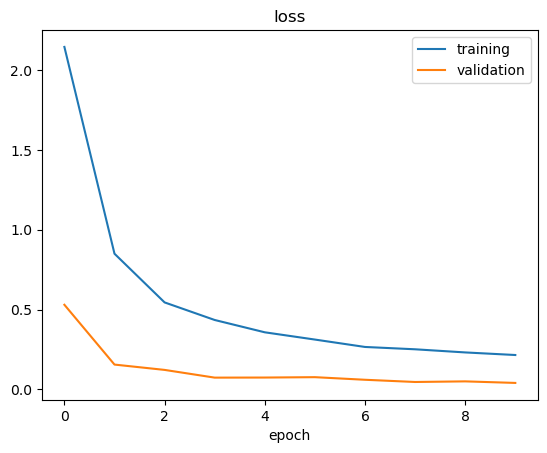

In [183]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')

In [184]:
score = model.evaluate(X_test, y_test, verbose = 0)

print('Test Score' , score[0])
print('Test Accuracy', score[1])

Test Score 0.1374192088842392
Test Accuracy 0.96421217918396


### Fine - tuning model 

- Purpose : Increase Accuracy

    - 1st Conv2D : 30 -> 60  * 2
    - 2nd Conv2D : 15 -> 30  * 2
    - Adam - Learning rate 
        - before : 0.01   <---> after : 0.001 
    - Over Fitting Problem 
        - add Dropout layers after Pooling process

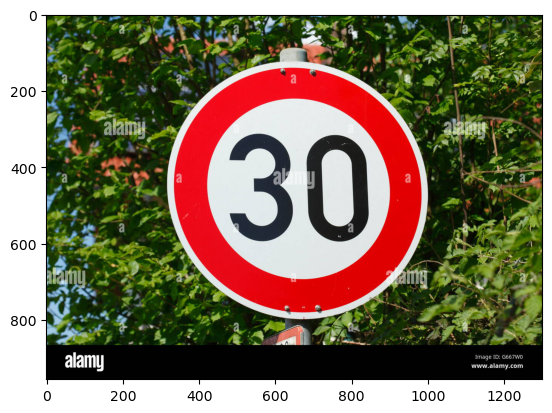

In [185]:
#fetch image
# url img 
# https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg

# https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg

# https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg

# https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg

# https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg
 
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))


(32, 32)


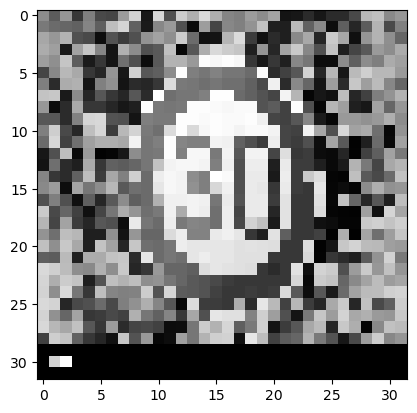

In [186]:
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)


In [187]:
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)
 
#Test image
prediction = model.predict(img)
predict_classes = np.argmax(prediction, axis=1)

print("predicted sign: ", predict_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
predicted sign:  [1]
